#Install Dependencies

_(Remember to choose GPU in Runtime if not already selected. Runtime --> Change Runtime Type --> Hardware accelerator --> GPU)_

In [1]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5  # clone repo

!git reset --hard fbe67e465375231474a2ad80a4389efc77ecff99

Cloning into 'yolov5'...
remote: Enumerating objects: 14974, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 14974 (delta 6), reused 9 (delta 3), pack-reused 14960
Receiving objects: 100% (14974/14974), 13.65 MiB | 18.69 MiB/s, done.
Resolving deltas: 100% (10344/10344), done.
fatal: not a git repository (or any of the parent directories): .git


In [2]:
!git clone https://github.com/visheshDWS/YoloV5BikeHelmet.git

Cloning into 'YoloV5BikeHelmet'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.


In [3]:
!git clone https://github.com/visheshDWS/SamplePicsYoloBikeHelmet.git

Cloning into 'SamplePicsYoloBikeHelmet'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.


In [4]:
%cd yolov5

/content/yolov5


In [5]:
# install dependencies as necessary
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
from utils.downloads import attempt_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

     |████████████████████████████████| 1.6 MB 5.1 MB/s 
Setup complete. Using torch 1.12.1+cu113 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


In [6]:
%cd /content/yolov5


/content/yolov5


#Run Inference  With Trained Weights
Run inference with a pretrained checkpoint on contents of `test/images` folder downloaded from Roboflow.

In [7]:
pwd

'/content/yolov5'

In [8]:
# when we ran this, we saw .007 second inference time. That is 140 FPS on a TESLA P100!
# use the best weights!
%cd /content/yolov5/
!python detect.py --weights /content/YoloV5BikeHelmet/BikeYoloV5.pt --img 416 --conf 0.4 --source /content/SamplePicsYoloBikeHelmet --line-thickness 1

/content/yolov5
detect: weights=['/content/YoloV5BikeHelmet/BikeYoloV5.pt'], source=/content/SamplePicsYoloBikeHelmet, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-240-gabbfd69 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
custom_YOLOv5s summary: 232 layers, 7246518 parameters, 0 gradients
image 1/6 /content/SamplePicsYoloBikeHelmet/BikesHelmets343.png: 288x416 1 Bike, 16.7ms
image 2/6 /content/SamplePicsYoloBikeHelmet/BikesHelmets681.png: 288x416 1 Bike, 9.1ms
image 3/6 /content/SamplePicsYoloBikeHelmet/BikesHelmets719.png: 416x416 1 Bike, 11.8ms
image 4/6 /content/SamplePicsYoloBikeHelmet/Bikes

In [9]:
# when we ran this, we saw .007 second inference time. That is 140 FPS on a TESLA P100!
# use the best weights!
%cd /content/yolov5/
!python detect.py --weights /content/YoloV5BikeHelmet/helmetYoloV5.pt --img 416 --conf 0.4 --source /content/yolov5/runs/detect/exp --line-thickness 1

/content/yolov5
detect: weights=['/content/YoloV5BikeHelmet/helmetYoloV5.pt'], source=/content/yolov5/runs/detect/exp, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-240-gabbfd69 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
custom_YOLOv5s summary: 232 layers, 7249215 parameters, 0 gradients
image 1/6 /content/yolov5/runs/detect/exp/BikesHelmets343.png: 288x416 1 With Helmet, 12.7ms
image 2/6 /content/yolov5/runs/detect/exp/BikesHelmets681.png: 288x416 1 Without Helmet, 10.4ms
image 3/6 /content/yolov5/runs/detect/exp/BikesHelmets719.png: 416x416 1 With Helmet, 10.7ms
image 4/6 /content/yolov5/runs

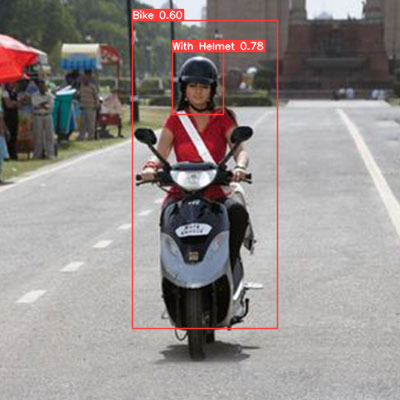

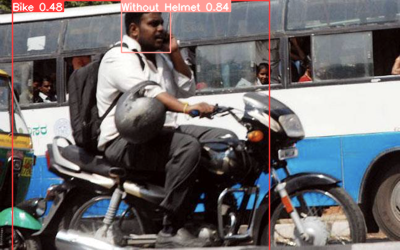

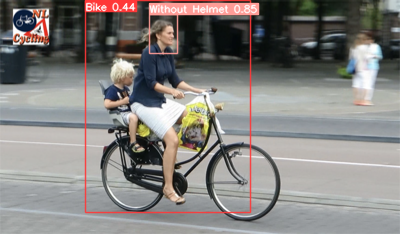

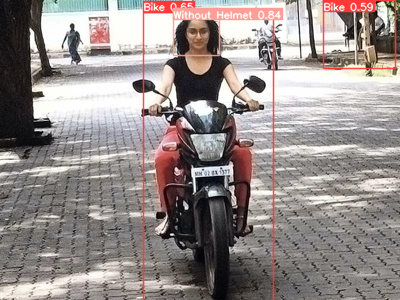

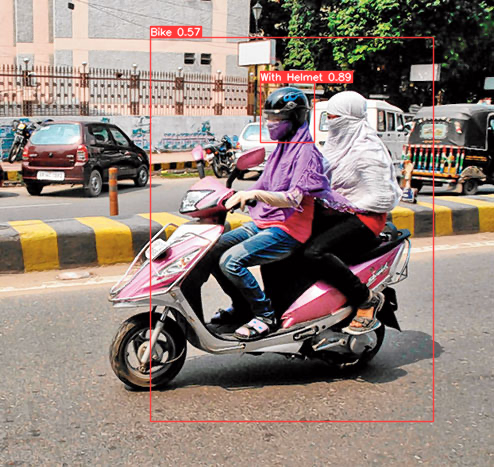

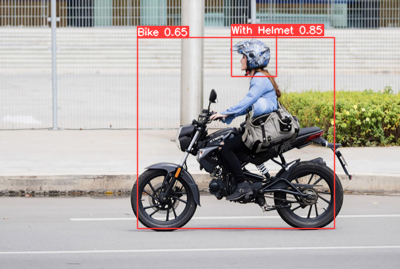

In [10]:
#display inference on ALL test images
#this looks much better with longer training above

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp2/*.png'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")